# Решение нелинейного уравнения

В данной работе предлагается различными способами решить и проанализировать скорость сходимости приближения к решению для нелинейного уравнения.

_Выбранное уравнение_: IV.12.4 - e)

$f(x) = x^2 - 20sin(x) = 0$

In [51]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import math as m


In [52]:
# определение эпсилон машинного для типа float64
i = 0
epsFloat = np.float64(1.0)
while (1 + epsFloat) != 1:
        epsFloat  = epsFloat / 2
        i += 1
print("Машинное эпсилон :", epsFloat)

Машинное эпсилон : 1.1102230246251565e-16


In [53]:
# make function, according our task

# make our function like f(x) = 0 
def MainFunction(x):
    d = x**(2) - 20*np.sin(x)
    return d

# calculate derivation of function by analysis
def AnaliticDerivate (x):
	d = np.linspace(0, 0, len(x))
	d = 2*x - 20*np.cos(x)
	return d

# calculate derivation of function by first approximation
def CalculationDerivateSingle(x, h, leng):
	d = np.linspace(0, 0, h)
	for i in range(h - 1):				
		d[i] = (x[i + 1] - x[i]) / (leng / h)
	d[h - 1] = d[h - 2]
	return d

# calculate derivation of function by second approximation
def CalculationDerivateDouble(x, h, leng):
	d = np.linspace(0, 0, h)
	for i in range(h - 2):
		d[i + 1] = (x[i + 2] - x[i]) / (2 * leng / h)
    # const for boundary points calculated by method of non-defined koefficients
	d[0] = (-1.5 * x[0] + 2 * x[1] - 0.5 * x[2]) / (leng / h)
	d[h - 1] = (0.5 * x[h - 3] - 2 * x[h - 2] + 1.5 * x[h - 1]) / (leng / h)
	return d


##  Локализация решения

Сначала необходимо (примерно) определить, в каких промежутках находится решение. В данной работе этот шаг выполнен с помощью графического анализа графика функции, а также анализа ее производной. 

Так как $sin(x)$ и $cos(x)$ являются ограниченными, то на $\pm \infty$ функция и ее производная ведут себя как ее полиноминальная часть: $x^2$ и $x$ соответственно. Это дает нам право предполагать, что на $\pm \infty$ решения уравнения нет. При построении графика функции на промежутке $[-20, 20]$ и затем $[-5, 5]$ мы можем убедиться, что данное уравнение имеет 2 решения - в нуле (точно) и на отрезке $[-2, 3]$

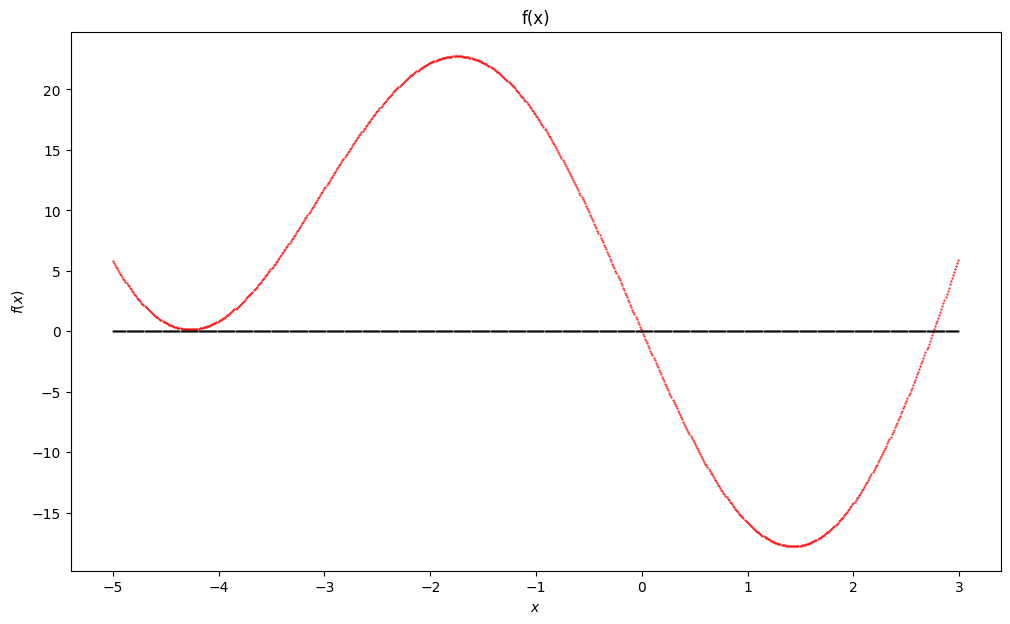

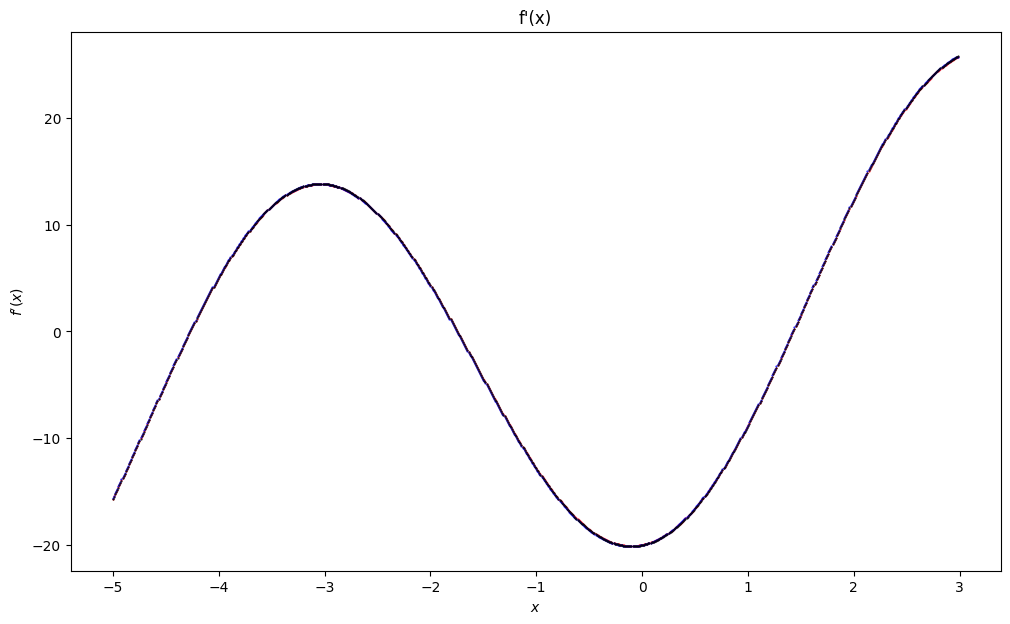

In [54]:
h = np.float64(0.01)
x = np.arange(-5, 3, h, dtype = np.float64())
leng = x[len(x) - 1] - x[0]

f = MainFunction(x)
der_f_an = AnaliticDerivate(x)
der_f_sing = CalculationDerivateSingle(f, len(f), leng)
der_f_doubl = CalculationDerivateDouble(f, len(f), leng)
ConstZero = np.zeros(len(x))

plt.figure(figsize=[12,7])
plt.plot(x, f, '.r', ms = 1)
plt.plot(x, ConstZero, '.k', ms = 1)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("f(x)")

# plt.legend()
plt.show()

plt.figure(figsize=[12,7])
plt.plot(x, der_f_an, '.r', ms = 1)
plt.plot(x, der_f_sing, '.b', ms = 1)
plt.plot(x, der_f_doubl, '.k', ms = 1)
plt.xlabel("$x$")
plt.ylabel("$f'(x)$")
plt.title("f'(x)")

# plt.legend()
plt.show()


Для простых итераций необходимо преобразовать исходное уравнение к виду $x = \phi (x)$

Тогда $x = sqrt(20 sin(x))$ - вид уравнения для решения методом простых итераций

In [55]:
# dichotomy to find a solution
def Dichotomy_find(left, right, delta):
    mid = (right + left) / 2
    while ((right - left) > delta):
        f = MainFunction(mid)
        if (f - np.float64(0.0)) > epsFloat :
            right = mid
        elif (np.float64(0.0) - f) > epsFloat:
            left = mid
        else:
            return mid
        mid = (right + left) / 2
    return mid

# function phi(x) for simple iterations method
def SimpleFunction(x):
    d = (20*np.sin(x))**(0.5)
    return d

# function phi'(x) for simple iterations method
def SimpleFunctionDer(x):
    d = np.sqrt(5 / np.sin(x))* np.cos(x)
    return d

# simple iterations to find a solution
def SimpleIter_discr(left, right, delta):
    mid = (left + right) / 2
    print (mid, 20* np.sin(mid))
    f = MainFunction(mid)
    while abs(f - np.float64(0.0)) > delta:
        mid = SimpleFunction(mid)
        f = MainFunction(mid)
        print (mid, 20*np.sin(mid))

    return mid

# Newton method 


    

In [56]:
# поиск корня в нуле
A = np.float64(-1)
B = np.float64(1)
delta = epsFloat

solution = Dichotomy_find(A, B, delta)
f = MainFunction(solution)
print("By Dichotomy: x = ", solution, "\n|f(x) - 0| = ", f - np.float64(0.0))

solution = SimpleIter_discr(A, B, delta)
f = MainFunction(solution)
print("By simple iterations with discrep stop: x = ", solution, "\n|f(x) - 0| = ", f - np.float64(0.0))



By Dichotomy: x =  0.0 
|f(x) - 0| =  0.0
0.0 0.0
By simple iterations with discrep stop: x =  0.0 
|f(x) - 0| =  0.0


In [61]:
# поиск корня в промежутке [2,3]
A = np.float64(2)
B = np.float64(3)
delta = 1e-15
# put some words about f' and other

solution = Dichotomy_find(A, B, delta)
f = MainFunction(solution)
print("By Dichotomy: x = ", solution, "\n|f(x) - 0| = ", f - np.float64(0.0))

By Dichotomy: x =  2.752946633818705 
|f(x) - 0| =  6.217248937900877e-15


Для нахождения решения методом простых итераций необходимо (для сходимости) чтобы на изначальном промежутке 
выполнялось $|\phi'(x)| <= q < 1$ . 




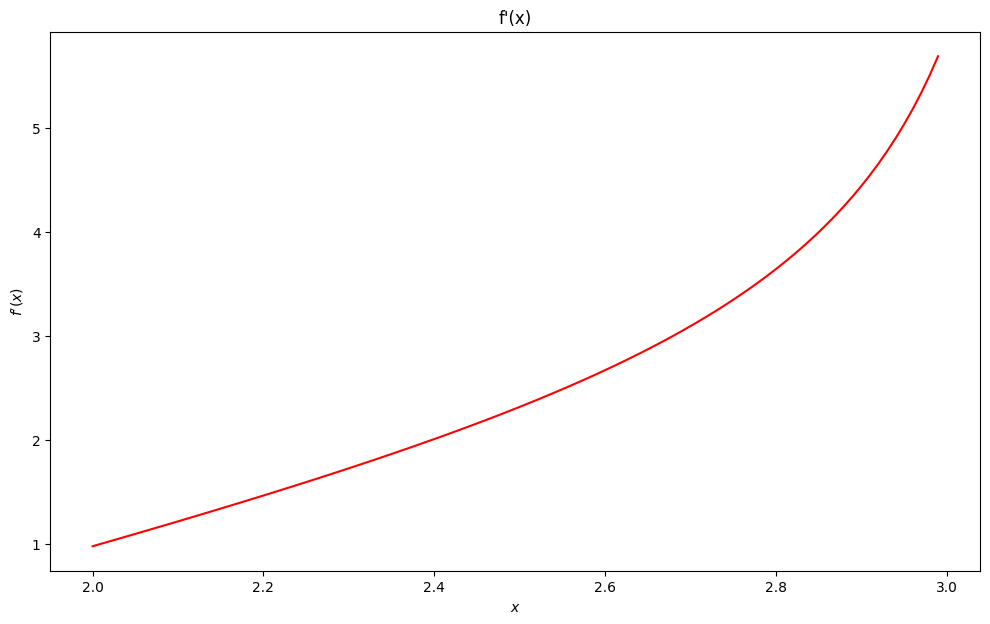

In [63]:
h = np.float64(0.01)
x = np.arange(A, B, h, dtype = np.float64())
der_f = abs(SimpleFunctionDer(x))

plt.figure(figsize=[12,7])
plt.plot(x, der_f, '-r')
plt.xlabel("$x$")
plt.ylabel("$f'(x)$")
plt.title("f'(x)")

plt.show()

Как видно из графика, на промежутке6 содержащем решение уравнения, мы не можем ограничить $\phi'(x)$ в связи с чем мы не можем найти решение методом простой итерации. _(Подумать, что сделать)_

## Анализ скорости сходимости методов

Проанализируем скорость сходимости метода Ньютона в зависимости от количества итераций (порядка приближения)